# Valdkonna mõistmine

Andmed on pärit Apify veebicrawlerist. Crawlitud on IMDB-st 450 filmi, ning nende žanrit ja kirjeldust
Oleks saanud ka rohkem, aga andmete arvutamine läks aeglaseks suuremate andmekogumikega.

Probleemiks on klassifitseerimine. Tuleb ennustada andmete abil, mis žanritega on tegemist, kui on antud sinule filmikirjeldus.
Selle ülesande lahendus aitaks erinevatel lehekülgedel automaatselt teksti klassifitseerida mingisuguste žanrite või tagide järgi.

Probleem: https://scikit-learn.org/stable/modules/multiclass.html

##### 

# Andmete mõistmine

In [2]:
import pandas as pd

df = pd.read_csv('imdb_dataset.csv')

df.columns

Index(['description', 'genre', 'title', 'url'], dtype='object')

In [3]:
df.head()

,description,genre,title,url
0,Kern County Deputy Sheriff Joe Deacon is sent ...,"Crime, Drama, Thriller",The Little Things (2021),https://www.imdb.com/title/tt10016180
1,"Offered a plea deal by the FBI, William O'Neal...","Biography, Drama, History",Judas and the Black Messiah (2021),https://www.imdb.com/title/tt9784798
2,In a world where supervillains are commonplace...,"Action, Adventure, Comedy, Fantasy, Sci-Fi",Thunder Force (2021),https://www.imdb.com/title/tt10121392
3,A faded television actor and his stunt double ...,"Comedy, Drama",Once Upon a Time... In Hollywood (2019),https://www.imdb.com/title/tt7131622
4,"The movie, based on Marvel Comics, will focus ...","Action, Adventure, Fantasy, Sci-Fi",Shang-Chi and the Legend of the Ten Rings (2021),https://www.imdb.com/title/tt9376612


In [4]:
df["genre_count"] = df["genre"].apply(lambda text: len(str(text).split(" ")))
df.head()

,description,genre,title,url,genre_count
0,Kern County Deputy Sheriff Joe Deacon is sent ...,"Crime, Drama, Thriller",The Little Things (2021),https://www.imdb.com/title/tt10016180,3
1,"Offered a plea deal by the FBI, William O'Neal...","Biography, Drama, History",Judas and the Black Messiah (2021),https://www.imdb.com/title/tt9784798,3
2,In a world where supervillains are commonplace...,"Action, Adventure, Comedy, Fantasy, Sci-Fi",Thunder Force (2021),https://www.imdb.com/title/tt10121392,5
3,A faded television actor and his stunt double ...,"Comedy, Drama",Once Upon a Time... In Hollywood (2019),https://www.imdb.com/title/tt7131622,2
4,"The movie, based on Marvel Comics, will focus ...","Action, Adventure, Fantasy, Sci-Fi",Shang-Chi and the Legend of the Ten Rings (2021),https://www.imdb.com/title/tt9376612,4


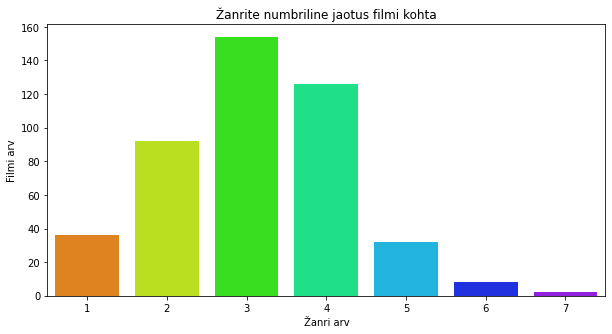

In [5]:
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

warnings.filterwarnings("ignore")

plt.figure(figsize=(10,5))
sns.countplot(df.genre_count, palette='gist_rainbow')
plt.title("Žanrite numbriline jaotus filmi kohta")
plt.xlabel("Žanri arv")
plt.ylabel("Filmi arv")
plt.show()

In [6]:
df.genre_count.value_counts()

3    154
4    126
2     92
1     36
5     32
6      8
7      2
Name: genre_count, dtype: int64

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(tokenizer = lambda x: x.split(','))

tag_dtm = vectorizer.fit_transform(df['genre'])

print("Kõik žanrid:", tag_dtm.shape[0])
print("Unikaalsed žanrid:", tag_dtm.shape[1])
print(tag_dtm.shape)

Kõik žanrid: 450
Unikaalsed žanrid: 30
(450, 30)


In [22]:
# Get all tags
tags = vectorizer.get_feature_names()

# 5 15 tags
print("žanrid:", tags)

žanrid: [' action', ' adventure', ' biography', ' comedy', ' crime', ' drama', ' family', ' fantasy', ' history', ' horror', ' music', ' musical', ' mystery', ' romance', ' sci-fi', ' sport', ' thriller', ' war', ' western', 'action', 'adventure', 'animation', 'biography', 'comedy', 'crime', 'drama', 'fantasy', 'horror', 'mystery', 'thriller']


In [9]:
freqs = tag_dtm.sum(axis=0).A1 #axis=0 for columns. Column contain the number of times the tags have occured
result = dict(zip(tags, freqs))
  
tag_df = pd.DataFrame({'Genre': list(result.keys()), 'Count': list(result.values())})
tag_df_sorted = tag_df.sort_values(['Count'], ascending=False)
tag_counts = tag_df_sorted['Count'].values
tag_df_sorted.head(10)

,Genre,Count
19,action,167
5,drama,145
16,thriller,140
1,adventure,124
14,sci-fi,124
25,drama,82
7,fantasy,81
23,comedy,62
13,romance,58
12,mystery,56


Text(0.5, 1.0, 'Kõik žanrid numbrite arvu järgi')

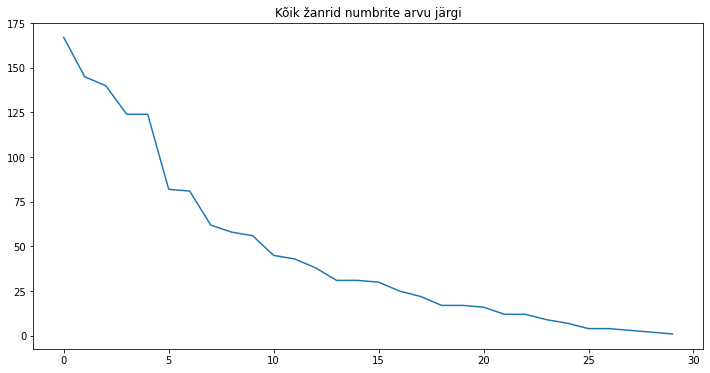

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(tag_counts)
plt.title("Kõik žanrid numbrite arvu järgi")

In [11]:
tag_quest_count = tag_dtm.sum(axis=1).tolist()
tag_quest_count=[int(j) for i in tag_quest_count for j in i]

print("Max arv žanreid ühel filmil: %d" % max(tag_quest_count))
print("Min arv žanreid ühel filmil: %d" % min(tag_quest_count))
print("Keskmine arv žanreid ühel filmil: %d" % (sum(tag_quest_count) / len(tag_quest_count)))

Max arv žanreid ühel filmil: 7
Min arv žanreid ühel filmil: 1
Keskmine arv žanreid ühel filmil: 3


### Andmete töötlus

Suuremad sammud: 
1) Tee sõnad täispikkuseks <br/>
2) Eemalda numbrid <br/> 
3) Eemalda erilised tähed <br/>
4) Tee sõna <i>lower-case'iks</i> ning võta üleliigsed tühikud ära <br/>
5) Filtreeri välja stop wordid https://en.wikipedia.org/wiki/Stop_word <br/>
6) Muuda kääne olevikku ning muuda kolmanda isiku käändes olevad sõnad esimesse isikusse (lemmatizer) better : good <br/>
7) Võta sõnade tüvi (stemming) Like on tüvi likes, liked, likely, liking <br/>

In [12]:
import re
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup

stopwords = set(stopwords.words('english'))

def eemalda_ylakomad(word):
    word = re.sub(r"won't", "will not", word)
    word = re.sub(r"can\'t", "can not", word)

    word = re.sub(r"n\'t", " not", word)
    word = re.sub(r"\'re", " are", word)
    word = re.sub(r"\'s", " is", word)
    word = re.sub(r"\'d", " would", word)
    word = re.sub(r"\'ll", " will", word)
    word = re.sub(r"\'t", " not", word)
    word = re.sub(r"\'ve", " have", word)
    word = re.sub(r"\'m", " am", word)
    return word

def formatText(text):
    processed_text = []
    
    snowball_stemmer = nltk.stem.SnowballStemmer('english')

    lemmatizer = WordNetLemmatizer()

    for sentence in text: 
        sentence = eemalda_ylakomad(sentence) # tee sõnad täis pikkuseks

        sentence = re.sub("\S*\d\S*", "", sentence) # eemalda numbrid
        sentence = re.sub('[^A-Za-z]+', ' ', sentence) # Tee kõik mitte-tähed tühikuteks 

        sentence = sentence.lower().strip() # Väikesteks tähtedeks ning eemalda üleliigsed tühikud

        processed_sentence = []

        for word in sentence.split():
            if word not in stopwords:
                lemmatized_word = lemmatizer.lemmatize(word)
                stemmed_word = snowball_stemmer.stem(lemmatized_word)

                processed_sentence.append(stemmed_word)

        processed_text.append(' '.join(processed_sentence))
        
    return processed_text

processed_text = formatText(df['description'].values) 

In [13]:
# Näidistekst
processed_text[0]

'kern counti deputi sheriff joe deacon sent los angel quick evid gather assign instead becom embroil search serial killer terror citi'

In [14]:
# Paneme dataframe'i puhta teksti
df['clean_description'] = processed_text

df.head()

,description,genre,title,url,genre_count,clean_description
0,Kern County Deputy Sheriff Joe Deacon is sent ...,"Crime, Drama, Thriller",The Little Things (2021),https://www.imdb.com/title/tt10016180,3,kern counti deputi sheriff joe deacon sent los...
1,"Offered a plea deal by the FBI, William O'Neal...","Biography, Drama, History",Judas and the Black Messiah (2021),https://www.imdb.com/title/tt9784798,3,offer plea deal fbi william neal infiltr illin...
2,In a world where supervillains are commonplace...,"Action, Adventure, Comedy, Fantasy, Sci-Fi",Thunder Force (2021),https://www.imdb.com/title/tt10121392,5,world supervillain commonplac two estrang chil...
3,A faded television actor and his stunt double ...,"Comedy, Drama",Once Upon a Time... In Hollywood (2019),https://www.imdb.com/title/tt7131622,2,fade televis actor stunt doubl strive achiev f...
4,"The movie, based on Marvel Comics, will focus ...","Action, Adventure, Fantasy, Sci-Fi",Shang-Chi and the Legend of the Ten Rings (2021),https://www.imdb.com/title/tt9376612,4,movi base marvel comic focus shang chi master ...


In [15]:
from sklearn.model_selection import train_test_split

X = df['clean_description']
y = df['genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head()

24                           continu spider man far home
17     film natasha romanoff quest film civil war inf...
66     american expat tri sell high profit marijuana ...
148    discov covert faulti intellig caus u armi offi...
249    depress woman learn husband kill car accid pre...
Name: clean_description, dtype: object

### Test andmete teisendamine vektori kujule


Kõik zanrid vektori kujule Bag of Words strateegiaga. Siin projektis katsetatakse ka erinevaid meetodeid piiramisega, et mis juhtub näiteks, et kui piirata igale filmile kuuluvate zanrite arvu, et kas täpsus paraneb või mitte.

In [24]:
# Y vectori kujule, lisaks saab anda parameetri kaasa anda max_tags, mis piirab vektorite arvu
def yToVectorFormat(max_tags):
    vectorizer = CountVectorizer(tokenizer = lambda x: x.split(' '), binary='true', max_features=max_tags)
    y_train_vect = vectorizer.fit_transform(y_train)
    y_test_vect = vectorizer.transform(y_test)
    print(vectorizer.get_feature_names())
    return y_train_vect, y_test_vect

In [27]:
y_train_example, y_test_example = yToVectorFormat(6)

print("Shape:", y_train_example.shape)
print(y_train_example.toarray())

['action,', 'adventure,', 'comedy,', 'drama,', 'sci-fi', 'thriller']
Shape: (360, 6)
[[1 1 0 0 1 0]
 [1 1 0 0 1 0]
 [1 0 1 0 0 0]
 ...
 [0 1 0 1 0 0]
 [0 0 1 1 0 0]
 [1 0 0 1 0 1]]


Samuti tuleb muuta kirjelduse andmed vektori kujule.

Selle asemel, et vaadata, mis on selle zanri kaal niisama neid kokku lugedes ja kokku liites, saab arvestada kaale tfdif transformeriga, mis minimeerib väga sagedaselt olevaid zanrite kaalu ja annab suurema kaalu (ja suurema olulisuse) väiksema sagedusega olevatele kaaludele - need on rohkem informatiivsed.

Valitakse kõige sagedaminini esinevaid sõnu (TF - term frequency). Tuleb ka arvestada, kui unikaalne on sõna, ehk kui mittesagedaselt see esineb (IDF - Inverse Document Frequency). Need kaks skoori korrutatakse omavahel ning selle tulemusena on kõige kasulikumad sõnad kõrgete TF-IDF skooridega.

Selle sisemalt saab kasutada N-gramme nii sõnade kui ka tähtedega, et mudelit täpsemaks teha. Unigram - 1 sõna, bi-gram - 2 sõna ning tri-gram 3 sõna. Näiteks bi-grami 'serial killer' loetakse ühe sõnana. Samuti on võimalik seda teha erinevate tähekombinatsioonidega.

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Word N-grams 1-3
def tfidfWordNGram(gram_num):
    vectorizer = TfidfVectorizer(min_df=0.00009, smooth_idf=True, norm="l2", tokenizer = lambda x: x.split(" "), sublinear_tf=False, ngram_range=(1, gram_num))
    X_train_ngram = vectorizer.fit_transform(X_train)
    X_test_ngram = vectorizer.transform(X_test)
    print(vectorizer.vocabulary_)
    return X_train_ngram, X_test_ngram

#C Character N-grams 1-6
def tfidfCharNGram(gram_start, gram_end):
    vectorizer = TfidfVectorizer(max_features=50000, strip_accents='unicode', analyzer='char', sublinear_tf=False, ngram_range=(gram_start, gram_end))
    X_train_ngram = vectorizer.fit_transform(X_train)
    X_test_ngram = vectorizer.transform(X_test)
    print(vectorizer.vocabulary_)
    return X_train_ngram, X_test_ngram
    
# X_train_hyper, X_test_hyper = tfidfWordNGram(X_train, X_test, 4)

In [19]:
X_train_example, X_test_example = tfidfWordNGram(3)
#     X_train_example, X_test_example = tfidfCharNGram(1, 3)

{'continu': 2075, 'spider': 9980, 'man': 6521, 'far': 3701, 'home': 5102, 'continu spider': 2078, 'spider man': 9983, 'man far': 6536, 'far home': 3702, 'continu spider man': 2079, 'spider man far': 9984, 'man far home': 6537, 'film': 3852, 'natasha': 7311, 'romanoff': 9065, 'quest': 8478, 'civil': 1748, 'war': 11711, 'infin': 5441, 'film natasha': 3861, 'natasha romanoff': 7312, 'romanoff quest': 9066, 'quest film': 8479, 'film civil': 3855, 'civil war': 1753, 'war infin': 11726, 'infin war': 5442, 'film natasha romanoff': 3862, 'natasha romanoff quest': 7313, 'romanoff quest film': 9067, 'quest film civil': 8480, 'film civil war': 3856, 'civil war infin': 1754, 'war infin war': 11727, 'american': 361, 'expat': 3518, 'tri': 11041, 'sell': 9411, 'high': 5010, 'profit': 8349, 'marijuana': 6618, 'empir': 3204, 'london': 6298, 'trigger': 11075, 'plot': 8116, 'scheme': 9250, 'briberi': 1270, 'blackmail': 1118, 'attempt': 689, 'steal': 10081, 'domain': 2867, 'american expat': 372, 'expat tr

In [20]:
print("Shape:", X_train_example.shape)
print(X_train_example[1])

Shape: (360, 12354)
  (0, 11727)	0.2085340914424823
  (0, 1754)	0.2085340914424823
  (0, 3856)	0.2085340914424823
  (0, 8480)	0.2085340914424823
  (0, 9067)	0.2085340914424823
  (0, 7313)	0.2085340914424823
  (0, 3862)	0.2085340914424823
  (0, 5442)	0.2085340914424823
  (0, 11726)	0.2085340914424823
  (0, 1753)	0.18520434670074204
  (0, 3855)	0.2085340914424823
  (0, 8479)	0.2085340914424823
  (0, 9066)	0.2085340914424823
  (0, 7312)	0.2085340914424823
  (0, 3861)	0.2085340914424823
  (0, 5441)	0.2085340914424823
  (0, 11711)	0.2526605808519304
  (0, 1748)	0.16187460195900175
  (0, 8478)	0.17769384642182515
  (0, 9065)	0.2085340914424823
  (0, 7311)	0.2085340914424823
  (0, 3852)	0.3237492039180035


# Modelleerimine

Siin meetodis näidatakse erinevaid meetodeid valideermiseks.<br/>
Täpsus - õigesti hinnatud<br/>
Hammingu kadu - Kui palju ennusati valesti <br/>
Precision - True Positives / All positives (True and False Positives) - Kui palju mudeli ennustatud positiivsetest tulemustest on tegelikult ka positiivsed?<br/>
Recall - True Positives / Actual Positives (True Positives and False Negatives) - Tegelikult arvust positiivsetest tulemustest, kui palju mudel ennustab, et see on positiivne?<br/>
Mikro F1-skoor - 2 * (precision * recall) / (precision + recall) Arvestab need mõlemad sisse <br/>

In [17]:
from sklearn import metrics

def printScores(y_test, predictions):
    accuraccy = metrics.accuracy_score(y_test, predictions)
    hamming_loss = metrics.hamming_loss(y_test, predictions)
    precision = metrics.precision_score(y_test, predictions, average='micro')
    recall = metrics.recall_score(y_test, predictions, average='micro')
    f1 = metrics.f1_score(y_test, predictions, average='micro')

    print("Täpsus: {:.4f}, Hammingu kadu: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1-skoor: {:.4f}"
          .format(accuraccy, hamming_loss, precision, recall, f1))

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

## sets best parameters according to f1_micro
def tuneParameters(params, classifier, X_train_fresh, y_train_fresh):
#     param_search_cv = GridSearchCV(classifier, param_grid=params, scoring='f1_micro', n_jobs=-1)
    param_search_cv = RandomizedSearchCV(estimator=classifier, param_distributions=params,
                                         n_iter=10, cv=5, scoring='f1_micro', n_jobs=-1, verbose=0)
    param_search_cv.fit(X_train_fresh, y_train_fresh)
    
    
#     print("Best estimator: ", rsearch_cv.best_estimator_)
#     print("Best Cross Validation Score: ", rsearch_cv.best_score_)
    
    classifier.set_params(**param_search_cv.best_params_)
    return classifier

In [62]:
from sklearn.model_selection import cross_val_score
import numpy as np

def calcCrossValueScore(clf, X_train, y_train):
    scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10)
    print("CV täpsus: {:.4f} +/- {:.4f}".format(np.mean(scores), np.std(scores)), end=" ")

In [58]:
# baas
def testBase(untuned_classifier, params):
    X_train_base, X_test_base = tfidfWordNGram(1)
    y_train_base, y_test_base = yToVectorFormat(None)

    classifier = tuneParameters(params, untuned_classifier, X_train_base, y_train_base)
    calcCrossValueScore(classifier, X_train_base, y_train_base)

    classifier.fit(X_train_base, y_train_base)
    predictions = classifier.predict(X_test_base)

    printScores(y_test_base, predictions)

In [57]:
def doMaxTags(untuned_classifier, params):
    for max_tags in range(2, 7):
        print("Max_tags:", max_tags)
        y_train_vect, y_test_vect = yToVectorFormat(max_tags)

        X_train_ngram, X_test_ngram = tfidfWordNGram(1)

        classifier = tuneParameters(params, untuned_classifier, X_train_ngram, y_train_vect)
        
        calcCrossValueScore(classifier, X_train_ngram, y_train_vect)

        classifier.fit(X_train_ngram, y_train_vect)
        predictions = classifier.predict(X_test_ngram)

        printScores(y_test_vect, predictions)

In [39]:
def doWordNGrams(untuned_classifier, params):
    for max_tags in range(2, 5):
        y_train_vect, y_test_vect = yToVectorFormat(max_tags)
        
        # word n-grams
        for i in range(1, 4):
            print("Max_tags: {:d}, wordNGram: {:d}".format(max_tags, i))
            
            X_train_ngram, X_test_ngram = tfidfWordNGram(i)
        
            classifier = tuneParameters(params, untuned_classifier, X_train_ngram, y_train_vect)
        
            calcCrossValueScore(classifier, X_train_ngram, y_train_vect)
        
            classifier.fit(X_train_ngram, y_train_vect)
            predictions = classifier.predict(X_test_ngram)
            
            printScores(y_test_vect, predictions)

In [49]:
def doCharNGram(untuned_classifier, params, y_train, y_test, max_tags, start, end):
        print("Max_tags: {:d}, charNGram: ({:d}, {:d})".format(max_tags, start, end))
            
        X_train_ngram, X_test_ngram = tfidfCharNGram(start, end)

        classifier = tuneParameters(params, untuned_classifier, X_train_ngram, y_train)
        
        calcCrossValueScore(classifier, X_train_ngram, y_train)

        classifier.fit(X_train_ngram, y_train)
        predictions = classifier.predict(X_test_ngram)

        printScores(y_test, predictions)
        
        
def doCharNGrams(untuned_classifier, params):
    for max_tags in range(2, 5):
        y_train_vect, y_test_vect = yToVectorFormat(max_tags)
        
        # char n-grams
        for i in range(4, 7):
            doCharNGram(untuned_classifier, params, y_train_vect, y_test_vect, max_tags, i, i)
            
        # Testing charNgram 3-6
        doCharNGram(untuned_classifier, params, y_train_vect, y_test_vect, max_tags, 3, 6)
        
        # Testing charNgram 1-6            
        doCharNGram(untuned_classifier, params, y_train_vect, y_test_vect, max_tags, 1, 6)


In [60]:
def testWithDifferentSettings(untuned_classifier, params):
    print("Base")
    testBase(untuned_classifier, params)
    print("MaxTags")
    doMaxTags(untuned_classifier, params)
    print("nwordNgrams and MaxTags")
    doWordNGrams(untuned_classifier, params)
    print("charNGrams and MaxTags")
    doCharNGrams(untuned_classifier, params)

#### Strateegia

Kasutasin One vs the rest multiclass (OvR) strateegiat.
https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html

See vaatab andmeid ning paneb sellele ühe või rohkem zanri ennustuse. (Multi-label classification)

In [59]:
## Log reg
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

params  = {"estimator__C": [1e-7, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0]}

ovr_log_reg = OneVsRestClassifier(LogisticRegression(penalty='l2', class_weight='balanced'), n_jobs=-1)

testWithDifferentSettings(ovr_log_reg, params)

\Base
Cross-val skoor: 0.0000 +/- 0.0000 Täpsus: 0.0000, Hammingu kadu: 0.1784, Precision: 0.2806, Recall: 0.6729, F1-skoor: 0.3960
\MaxTags
Max_tags: 2
Cross-val skoor: 0.4528 +/- 0.0735 Täpsus: 0.4778, Hammingu kadu: 0.3222, Precision: 0.5579, Recall: 0.7681, F1-skoor: 0.6463
Max_tags: 3
Cross-val skoor: 0.3528 +/- 0.0646 Täpsus: 0.3889, Hammingu kadu: 0.3000, Precision: 0.5714, Recall: 0.7600, F1-skoor: 0.6524
Max_tags: 4
Cross-val skoor: 0.2417 +/- 0.0796 Täpsus: 0.3000, Hammingu kadu: 0.2778, Precision: 0.5926, Recall: 0.7385, F1-skoor: 0.6575
Max_tags: 5
Cross-val skoor: 0.1250 +/- 0.0417 Täpsus: 0.1333, Hammingu kadu: 0.3178, Precision: 0.4975, Recall: 0.6972, F1-skoor: 0.5806
Max_tags: 6
Cross-val skoor: 0.0972 +/- 0.0398 Täpsus: 0.1333, Hammingu kadu: 0.3185, Precision: 0.4691, Recall: 0.7261, F1-skoor: 0.5700

wordNgrams and MaxTags
Max_tags: 2, wordNGram: 1
Cross-val skoor: 0.4528 +/- 0.0735 Täpsus: 0.4778, Hammingu kadu: 0.3222, Precision: 0.5579, Recall: 0.7681, F1-skoor: 

In [61]:
## Random forest
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np

params = {'estimator__n_estimators': [10,50,75,100,150,250,350,500,750,850,1000,1500,2000],
          'estimator__min_weight_fraction_leaf': [0,0.25,0.5],
          'estimator__max_depth': np.arange(1,6),
          'estimator__min_samples_leaf': np.arange(0.05,0.5,0.05),
          'estimator__min_samples_split': np.arange(0.05,1.0,0.05)}

ovr_random_forest = OneVsRestClassifier(RandomForestClassifier(criterion='gini', class_weight='balanced'), n_jobs=-1)

testWithDifferentSettings(ovr_random_forest, params)

Base
Cross-val skoor: 0.0000 +/- 0.0000 Täpsus: 0.0000, Hammingu kadu: 0.2007, Precision: 0.1778, Recall: 0.3609, F1-skoor: 0.2382
MaxTags
Max_tags: 2
Cross-val skoor: 0.2444 +/- 0.1365 Täpsus: 0.2778, Hammingu kadu: 0.5389, Precision: 0.3444, Recall: 0.4493, F1-skoor: 0.3899
Max_tags: 3
Cross-val skoor: 0.1750 +/- 0.1139 Täpsus: 0.2556, Hammingu kadu: 0.3704, Precision: 0.0000, Recall: 0.0000, F1-skoor: 0.0000
Max_tags: 4
Cross-val skoor: 0.0222 +/- 0.0208 Täpsus: 0.0444, Hammingu kadu: 0.4389, Precision: 0.3444, Recall: 0.2385, F1-skoor: 0.2818
Max_tags: 5
Cross-val skoor: 0.0222 +/- 0.0299 Täpsus: 0.1111, Hammingu kadu: 0.4400, Precision: 0.3444, Recall: 0.4366, F1-skoor: 0.3851
Max_tags: 6
Cross-val skoor: 0.0528 +/- 0.0760 Täpsus: 0.0000, Hammingu kadu: 0.6056, Precision: 0.2639, Recall: 0.6051, F1-skoor: 0.3675
nwordNgrams and MaxTags
Max_tags: 2, wordNGram: 1
Cross-val skoor: 0.1917 +/- 0.1155 Täpsus: 0.3556, Hammingu kadu: 0.4611, Precision: 0.4222, Recall: 0.5507, F1-skoor: 0.

In [63]:
## Perceptron
from sklearn.linear_model import Perceptron
from sklearn.multiclass import OneVsRestClassifier

params  = {"estimator__alpha": [1e-7, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0]}

ovr_log_reg = OneVsRestClassifier(Perceptron(penalty='l2', class_weight='balanced'), n_jobs=-1)

testWithDifferentSettings(ovr_log_reg, params)

Base
CV täpsus: 0.0000 +/- 0.0000 Täpsus: 0.0000, Hammingu kadu: 0.2131, Precision: 0.2178, Recall: 0.5602, F1-skoor: 0.3137
MaxTags
Max_tags: 2
CV täpsus: 0.4750 +/- 0.0562 Täpsus: 0.3556, Hammingu kadu: 0.3667, Precision: 0.5181, Recall: 0.6232, F1-skoor: 0.5658
Max_tags: 3
CV täpsus: 0.3917 +/- 0.0697 Täpsus: 0.2778, Hammingu kadu: 0.3407, Precision: 0.5345, Recall: 0.6200, F1-skoor: 0.5741
Max_tags: 4
CV täpsus: 0.2500 +/- 0.0724 Täpsus: 0.2222, Hammingu kadu: 0.3167, Precision: 0.5548, Recall: 0.6231, F1-skoor: 0.5870
Max_tags: 5
CV täpsus: 0.1083 +/- 0.0548 Täpsus: 0.1556, Hammingu kadu: 0.3333, Precision: 0.4780, Recall: 0.6127, F1-skoor: 0.5370
Max_tags: 6
CV täpsus: 0.0833 +/- 0.0412 Täpsus: 0.1444, Hammingu kadu: 0.3111, Precision: 0.4732, Recall: 0.6178, F1-skoor: 0.5359
nwordNgrams and MaxTags
Max_tags: 2, wordNGram: 1
CV täpsus: 0.4750 +/- 0.0562 Täpsus: 0.3556, Hammingu kadu: 0.3667, Precision: 0.5181, Recall: 0.6232, F1-skoor: 0.5658
Max_tags: 2, wordNGram: 2
CV täpsus: 

# Järeldused

1) Algselt ilma žanrite piiramiseta oli ennustamistäpsus väga madal kõikide proovitud algoritmidega. <br>
2) Peale piiramist läks täpsus ning f1-skoor märgatavalt üles <br>
3) Seda edasi aitas täpsust tõsta word N-gramide kasutus <br>
4) Character N-gramide kasutamine aitas osadel algoritmidel tõsta veel täpsust (log-reg), aga osadel jäi tulemus samaväärseks 
<br>
5) Keskmiselt kõike pareminini sai OneVsRest meetodiga hakkama Log-reg algoritm, millel oli keskmisel kõige suurem f1-skoor <br>
6) Kõige parem f1-skoor oli log-reg algoritmil 0.6707 <br>